In [1]:
from collections import Counter
import scipy as sp
from scipy import special
import numpy as np
import matplotlib.pyplot as plt

##

## <h2><center>$D^{m}_{j_1, \dots, j_i} = {m \choose j_1} { m-j_i \choose j_2} \dots { m-j_1\dots-j_{i-1} \choose j_i} a^{j_1}_{j_1} \dots a^{j_i}_{j_i}$</center></h2>

In [259]:
def partitions(n , I=1):
    """Enumerate all the integer parition of n"""
    yield (n,)
    for i in range(I, n//2 + 1):
        for p in partitions(n-i, i):
            yield (i,) + p
            
def convolution(m):
    if m == 0:
        def C_0(a_s, f_derivatives):
            assert len(a_s) == len(f_derivatives)
            return f_derivatives[0]
        return C_0
    ##############################
    parts = list(partitions(m))
    # Find the degeneracy of the integer per part
    degeneracies = [Counter(p) for p in parts]
    #print(degeneracies)
    # indices
    indices_seq = [[k for k in d.keys()]
                      for d in degeneracies]
    #print(indices_seq)
    # counts of degeneracies per part: j_1, j_2, ..., j_i 
    degeneracies_counts = [[v for v in d.values()]
                              for d in degeneracies]
    degeneracies_totals = [sum(d.values()) for d in degeneracies]
    #print(degeneracies_counts)
    #print(degeneracies_totals)
    # decreasing sequence of m, m-j_1, ..., m-j_1-...-j_{i-1}  
    dec_seq = [[totals-sum(p[:i]) for i,v in enumerate(p)]
                   for p, totals in zip(degeneracies_counts,degeneracies_totals)]
    #print(dec_seq)
    # Find combinations per  part   
    comb_m_seq = [[special.comb(s, j, exact=True) for s,j in zip(seq, counts)]
                for seq, counts in zip(dec_seq, degeneracies_counts)]
    #print(comb_m_seq)
    comb_m_seq = [np.prod(p) for p in comb_m_seq]
    #print(comb_m_seq)
    # Combine all to make ( binomial coefs,derivative_order , list_of_indice, degenerecies )
    D_m_seq = [(bino_coef, derivative_order, indices, term_deg)
                for bino_coef, derivative_order , indices, term_deg in zip(comb_m_seq, degeneracies_totals, indices_seq, degeneracies_counts)]
    #print(D_m_seq)
    #m_factorial = sp.special.factorial(m, exact=True)
    
    def C_m(a_s, f_derivatives):
        assert(len(a_s) == len(f_derivatives))
        ret = [((bino_coef *  np.prod([ a_s[i]**j for i , j in zip(indices, term_deg)]))
                   * f_derivatives[d_order] / special.factorial(d_order, exact=True))                                
                 for bino_coef, d_order , indices, term_deg in D_m_seq]
        return ret
    
    return C_m


def composition(n, a_s, derivative_funcs):
    #assert n+1 == len(derivative_funcs)
    #assert n+1 == len(a_s)    
    assert len(a_s) == len(derivative_funcs)
    C_s = [convolution(i) for i in range(n+1)]
    a_0 = a_s[0]
    derivative_values = [derivative_funcs[i](a_0) for i in range(n+1)]
    #print(n, derivative_values)
    #print([C_s[i](a_s[:i+1], derivative_values[:i+1]) for i in range(n+1)])
    #print([np.sum(C_s[i](a_s[:i+1], derivative_values[:i+1])) for i in range(n+1)])
    coefs = [np.sum(C_s[i](a_s[:i+1], derivative_values[:i+1])) for i in range(n+1)]
    def power_series(t):
        return np.sum([ (t ** i)*c for i, c in zip(range(n+1),coefs)])
    return power_series
        
        

In [260]:
r = composition(2, [1, 1, 1, 1], [lambda x: x+1]*4)
r(0)

2.0

In [261]:
f0 = lambda x: x
f1 = lambda x: 1
f2 = lambda x: 0
derivative_funcs = [f0, f1] + [f2]*10

g = lambda x: np.sin(x)
g1 = lambda x: np.cos(x)
g2 = lambda x: -np.sin(x)

g3 = lambda x: -np.cos(x)

derivative_funcs = [g, g1, g2, g3]*40


g = lambda x: np.sin(x)

a_s = [0, 1] + [0]*40



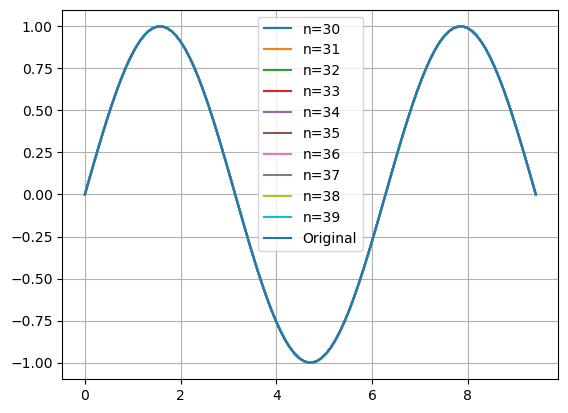

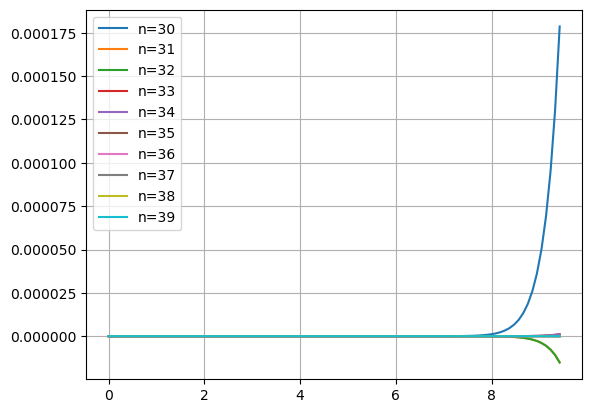

In [6]:
ts = np.linspace(0, 3*np.pi, 100)

for n in range(30,40):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, g(f0(ts)), label="Original")
plt.legend();plt.grid();plt.show()

for n in range(30,40):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - g(f0(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()


In [353]:
1/6

0.16666666666666666

In [435]:
f0 = lambda x: np.sin(x)
f1 = lambda x: np.cos(x)
f2 = lambda x: -np.sin(x)
f3 = lambda x: -np.cos(x)

derivative_funcs = [f0, f1, f2, f3]*100
g = lambda x: 1/(1 - x)



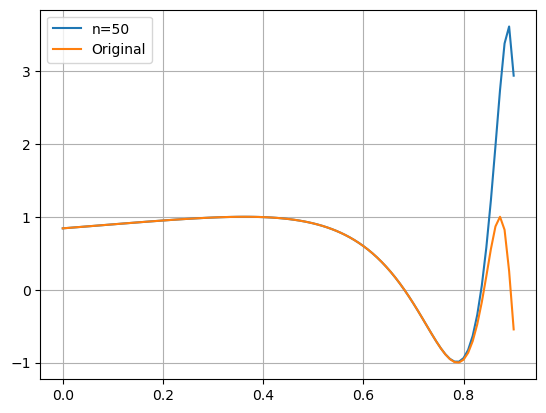

In [436]:
ts = np.linspace(0, .9, 100)

for n in range(50, 51):
    f_comp = composition(n, [1]*(n+1), derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, f0(g(ts)), label="Original")
plt.legend();plt.grid();plt.show()

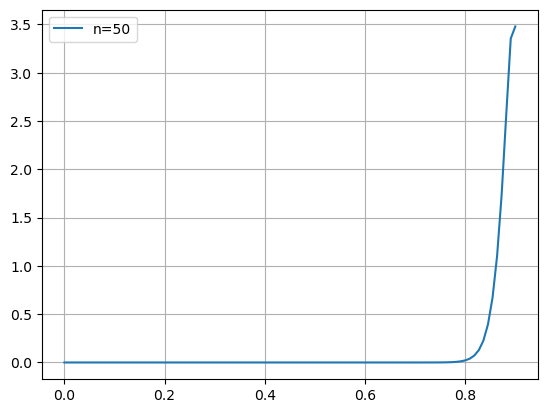

In [437]:
for n in range(50, 51):
    f_comp = composition(n, [1]*(n+1), derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - f0(g(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()

In [234]:
f0(0)

0.0

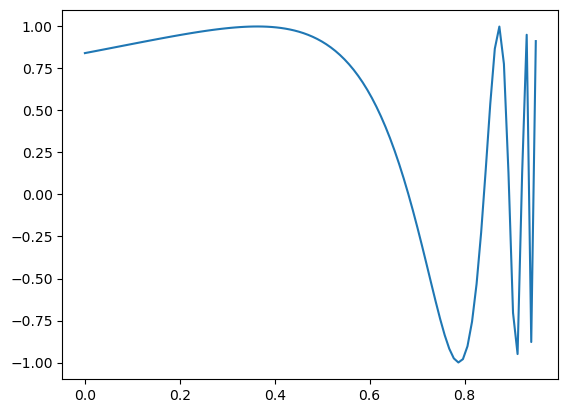

In [423]:
ts = np.linspace(0, .95, 100)
plt.plot(ts, f0(g(ts)))

In [17]:
import jax
from jax import jit

In [257]:
g = lambda x: 1/(1+(x/.5)**2)


n_max = 10
derivative_funcs = [jit(g)]
_ = derivative_funcs[-1](0.0)
for i in range(n_max):
    derivative_funcs.append(jax.grad(derivative_funcs[-1]))
    # spped up the compilation
    #_ = derivative_funcs[-1](0.0)
    
# speed up the compilation
#[g_m(0.0) for g_m in derivative_funcs]
    

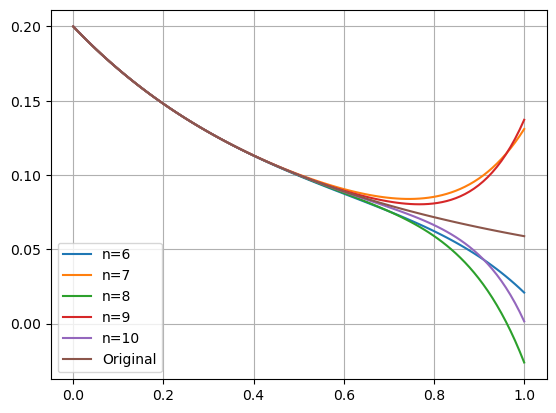

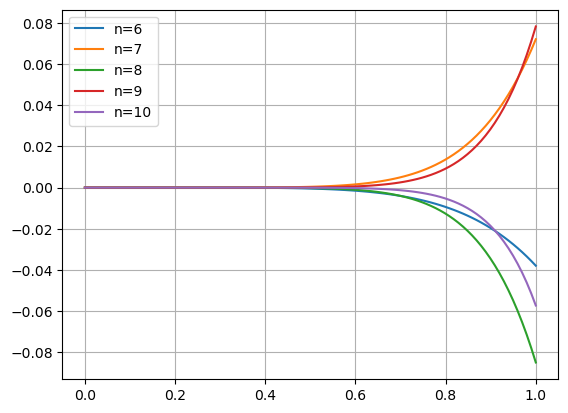

In [258]:
#a_s = [0.0, 1.0] + [0.0]*40
a_s = [1.0, 1.0] + [0.0]*40
f = lambda x: 1.0 + x

ts = np.linspace(0, 1, 100)
n_range = range(6,11)
for n in n_range:
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, g(f(ts)), label="Original")
plt.legend();plt.grid();plt.show()

for n in n_range:
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts] - g(f(ts)), label=f"n={n}")
    
plt.legend();plt.grid();plt.show()



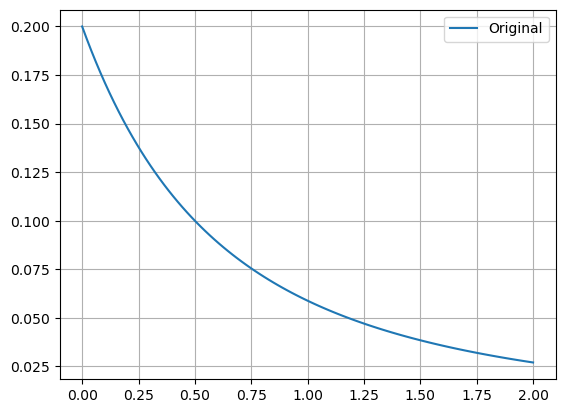

In [252]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, g(f(ts)), label="Original")
plt.legend();plt.grid();plt.show()

In [128]:
isinstance(x, Constant)

False

In [228]:
#class operator:



class function:
    #def __init__(self):        
    def __add__(self, other):
        return add_operator(self, other)
        
    def __mul__(self, other):
        return mul_operator(self, other)
    
    def __truediv__(self, other):
        return div_operator(self, other)
    
    def __pow__(self, other):
        if isinstance(other, Constant):
            return pow_operator(self, other.c)
        elif isinstance(other, int):
            return pow_operator(self, other)
        else:
            raise ValueError("Power must be a Constant or int.")
        
    def __call__(self, x):
        pass
    
    def derivative(self):
        pass


class Constant(function):
    def __init__(self, c):
        self.c = c
    def __call__(self, x):
        return self.c
    
    def derivative(self):
        return Constant(0.0) 

class X(function):
    def __call__(self, x):
        return x
    def derivative(self):
        return Constant(1.0) 
    
class Act(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return 1.0 / (1 + (self.k/(x ))**self.n.c)
    
    def derivative(self):
        #return Constant(self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
        return Act_prime(self.k, self.n.c)
    
class Inh(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        return 1.0 / (1 + (x/(self.k + 1e-40))**self.n.c)  
    
    def derivative(self):
        #return Constant(-self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
        return Inh_prime(self.k, self.n.c)
    
class Act_prime(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return (self.n.c/x)*(1.0 / (1 + (self.k/(x ))**self.n.c))*(1.0 / (1 + (x/(self.k ))**self.n.c))
    
    def derivative(self):
        return Constant(self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)
    
class Inh_prime(function):
    def __init__(self, k, n):
        self.k = k
        self.n = Constant(n)
        
    def __call__(self, x):
        if x == 0.0:
            return 0.0
        return (-self.n.c/x)*(1.0 / (1 + (self.k/(x ))**self.n.c))*(1.0 / (1 + (x/(self.k ))**self.n.c))
    
    def derivative(self):
        return Constant(-self.n.c)*(X() ** -1)*Act(self.k, self.n.c)*Inh(self.k, self.n.c)    
    
class binary_operator(function):
    def __init__(self, left, right):        
        self.left = left
        self.right = right
        
    def __call__(self, x):
        pass
    
    def derivative(self):
        pass
    
class add_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __call__(self, x):
        return self.left(x) + self.right(x)
    
    def derivative(self):
        return self.left.derivative() + self.right.derivative()

class mul_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right

    def __call__(self, x):
        return self.left(x) * self.right(x)
    
    def derivative(self):
        if isinstance(self.left, Constant) and isinstance(self.right, Constant):
            return Constant(0.0)
        elif isinstance(self.left, Constant):
            return self.left*self.right.derivative()        
        elif isinstance(self.right, Constant):
            return self.left.derivative() * self.right
        else:
            return self.left.derivative() * self.right + self.left*self.right.derivative()

class div_operator(binary_operator):
    def __init__(self, left, right):
        self.left = left
        self.right = right
        
    def __call__(self, x):
        return self.left(x) / (self.right(x) + 1e-40)
    
    def derivative(self):
        return (self.left.derivative() / (self.right(x) + 1e-40) 
                - (self.left*self.right.derivative())/(self.right(x) + 1e-40) )

class pow_operator(binary_operator):
    def __init__(self, left, p):
        self.left = left
        self.p = p
        
    def __call__(self, x):
        
        return (self.left(x)+ 1e-40) ** self.p
    
    def derivative(self):
        if self.p != 1:
            return Constant(self.p) * pow_operator(self.left, self.p-1) * self.left.derivative()
        else:
            return self.left.derivative()


class function_compund(function):
    def __init__(self, left, right,op):
        self.left = left
        self.right = right
        self.op = op

In [229]:
G1 = lambda x: 1/(1+(1.0/(x+1e-40))**2)
g1 = lambda x: 1/(1+(x/1.0)**2)

H1 = Act(k=1,n=2)
h1 = Inh(k=1,n=2)
x = X()

n_1 = Constant(2)
minus = Constant(-1)
H1_p_h1 = H1 + h1
H1_t_h1 = H1 * h1
H1_d_h1 = H1 / h1

In [230]:
H1(1), h1(1), H1_p_h1(1), H1_t_h1(1), H1_d_h1(1), (minus * x + H1_d_h1)(1) 

(0.5, 0.5, 1.0, 0.25, 1.0, 0.0)

In [231]:
minus.derivative()(0), x.derivative()(0), x.derivative().derivative()(0)

(0.0, 1.0, 0.0)

In [232]:
(X() ** -1).derivative()(2)

-0.25

In [233]:
(x ** Constant(1)).derivative()(3)

1.0

In [245]:
val = 0.0
print(H1(val), G1(val), h1(val), g1(val))
H1.derivative()(val), jax.grad(G1)(val), h1.derivative()(val), jax.grad(g1)(val)

0.0 1e-80 1.0 1.0


(0.0,
 Array(nan, dtype=float32, weak_type=True),
 -0.0,
 Array(-0., dtype=float32, weak_type=True))

In [246]:
(H1.derivative().derivative()(val), 
 jax.grad(jax.grad(G1))(val), 
 h1.derivative().derivative()(val), 
 jax.grad(jax.grad(g1))(val))

(0.0,
 Array(nan, dtype=float32, weak_type=True),
 0.0,
 Array(-2., dtype=float32, weak_type=True))

In [237]:
n_max = 5
derivative_funcs = [H1]

for i in range(n_max):
    derivative_funcs.append(derivative_funcs[-1].derivative())


In [238]:
H1(0)

0.0

In [239]:
[f(0.0) for f in derivative_funcs]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

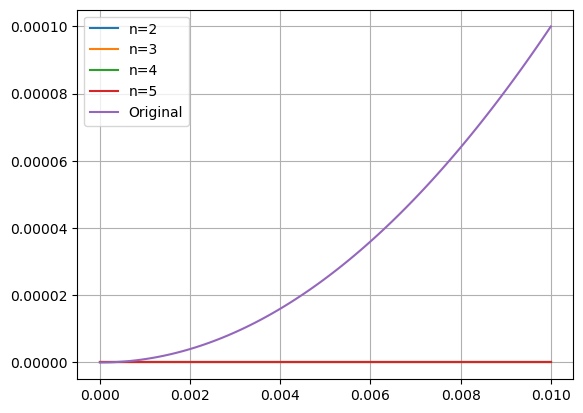

In [242]:
a_s = [0.000000, 1.0] + [0.0]*n_max

ts = np.linspace(0, .01, 100)

for n in range(2, n_max+1):
    f_comp = composition(n, a_s[:n+1], derivative_funcs[:n+1])
    plt.plot(ts, [f_comp(t) for t in ts], label=f"n={n}")
    
plt.plot(ts, [H1(t) for t in ts], label="Original")
plt.legend();plt.grid();plt.show()
